# How to do curve fitting
This notebook shows how you can fit some points to a model. Here, I used the model
$$m(x)=b + a e^{k x}$$
which is defined in the function ```exponential```

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

## Fitting Model

In [2]:
def exponential(x, a, k, b):
    return a*np.exp(x*k) + b

## Test data

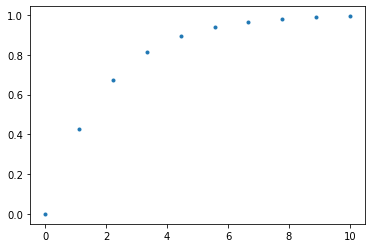

In [4]:
x = np.linspace(0,10,10)

a = -1
b = 1
k = -0.5

y = exponential(x,a,k,b)
plt.plot(x,y,'.');

## Do the fitting
### Clean data

In [5]:
popt_exponential, pcov_exponential = curve_fit(exponential, x, y, p0=[-1.1,-0.6,1.05])
print('fitted parameters',popt_exponential)

fitted parameters [-1.  -0.5  1. ]


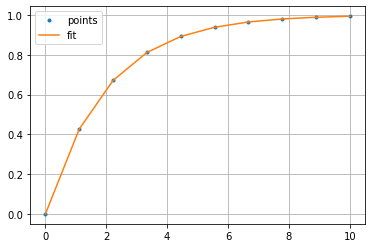

In [6]:
plt.plot(x,y,'.',label='points')
plt.plot(x,exponential(x,popt_exponential[0],popt_exponential[1],popt_exponential[2]),label='fit')
plt.grid()
plt.legend();

### Noisy data

In [7]:
ny = y+ 0.05*np.random.randn(len(y))
popt_exponential, pcov_exponential = curve_fit(exponential, x, ny, p0=[-1.1,-1,1.05])
print('fitted parameters',popt_exponential)

fitted parameters [-1.0080875  -0.42578005  1.05284043]


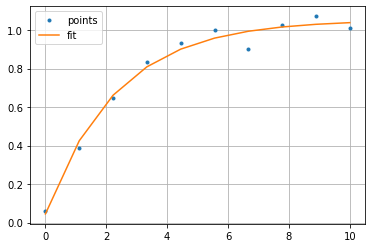

In [8]:
plt.plot(x,ny,'.',label='points')
plt.plot(x,exponential(x,popt_exponential[0],popt_exponential[1],popt_exponential[2]),label='fit')
plt.grid()
plt.legend();

In [9]:
popt_exponential

array([-1.0080875 , -0.42578005,  1.05284043])

In [10]:
pcov_exponential

array([[ 0.00251124, -0.00015802, -0.00073316],
       [-0.00015802,  0.0029146 ,  0.00138426],
       [-0.00073316,  0.00138426,  0.00106649]])

In [13]:
np.diag(pcov_exponential)

array([0.00251124, 0.0029146 , 0.00106649])

In [11]:
perrors = np.sqrt(np.diag(pcov_exponential))

In [12]:
perrors

array([0.05011231, 0.05398701, 0.03265721])